## Binary Classification : 
Predict hadwritten numbers......

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, Y_train), (X_test,Y_test) = keras.datasets.mnist.load_data()

In [20]:
X_train = X_train/255
X_test = X_test/255

In [7]:
len(X_test)

10000

In [11]:
X_train.shape

(60000, 28, 28)

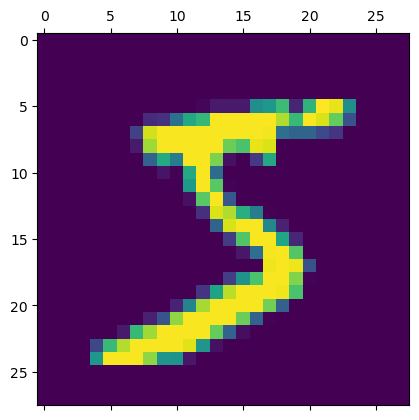

In [24]:
plt.matshow(X_train[0])

In [4]:
Y_train[0]

5

In [12]:
#### Flatenning is done so that 28*28 matrix is converted into single dimension array so that inputs can be given to neurons (ache se...)

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [13]:
X_test_flat.shape

(10000, 784)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.7120 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0522 - accuracy: 0.8773
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6434 - accuracy: 0.8832
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3960 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4528 - accuracy: 0.8881


In [25]:
model.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.5648 - accuracy: 0.8915


[5.564767360687256, 0.8914999961853027]

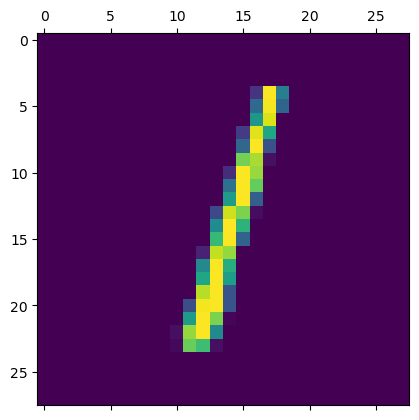

In [35]:
plt.matshow(X_test[2])

In [36]:
y_predicted = model.predict(X_test_flat)
print(y_predicted[2])

313/313 [==============================] - 1s 2ms/step
[0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 3.1080422e-19
 7.9926187e-01 1.0000000e+00 4.2917831e-13 1.0000000e+00 5.6641742e-08]


In [37]:
np.argmax(y_predicted[2])           ##hehehhe model ne galat predict kiya

1

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[2, 0, 1, 0, 4]

In [40]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [41]:
##Now we will create a confusion matrix which will show how many values are actually wrongly predicted
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_predicted_labels)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    1,    1,    2,    0,    0,    0,    0,    0],
       [   4, 1128,    3,    0,    0,    0,    0,    0,    0,    0],
       [ 259,  295,  473,    2,    3,    0,    0,    0,    0,    0],
       [ 265,  188,  445,  112,    0,    0,    0,    0,    0,    0],
       [ 104,   78,  300,  317,  182,    0,    0,    0,    1,    0],
       [ 365,   42,  206,  217,   33,   28,    1,    0,    0,    0],
       [ 299,   37,  614,    2,    5,    0,    1,    0,    0,    0],
       [  64,  109,  417,  430,    7,    0,    0,    1,    0,    0],
       [ 138,  225,  515,   78,   11,    6,    1,    0,    0,    0],
       [  48,   72,  287,  560,   42,    0,    0,    0,    0,    0]])>

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2705 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1240 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0669 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9830


In [51]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 1ms/step


In [52]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_predicted_labels)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    3,    0,    1,    3,    2,    0,    6,    1],
       [   0, 1117,    4,    0,    0,    1,    2,    0,   11,    0],
       [   2,    1, 1008,    3,    2,    0,    2,    3,   11,    0],
       [   0,    0,    8,  984,    0,    5,    0,    3,    6,    4],
       [   1,    0,    4,    0,  966,    0,    2,    1,    2,    6],
       [   2,    0,    0,    6,    2,  867,    2,    0,   12,    1],
       [   2,    2,    2,    1,    5,    6,  932,    1,    7,    0],
       [   1,    5,    9,    4,    0,    0,    0,  990,    7,   12],
       [   2,    0,    3,    3,    1,    3,    0,    1,  960,    1],
       [   2,    4,    0,    6,    7,    6,    0,    5,   11,  968]])>

BBBBBBBBBOOOOOOOOHHHHHHHHHAAAAAAAAAAATTTTTTT MMMMMAAAAAAAJJJJJJJAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA GGGGGGGAAAAAAAAAAYYYYAAAAAAAA hahahhahahahahhahaha

## Exercise :
Do the same model by using cnn and print the classfication report for both ann and cnn and see the differnce in all the parameters.

In [2]:
cm.accuracy

NameError: name 'cm' is not defined